In [2]:
from qiskit import BasicAer
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_histogram

In [2]:
def construct_bv_circuit(s):
    # n qubits for input 'x', 1 qubit for output 
    # n classical bits for final measurements
    n = len(s)
    bv_circuit = QuantumCircuit(n+1, n)
    # put output wire into |-> state
    bv_circuit.h(n)
    bv_circuit.z(n)
    # apply H to all input wires
    for i in range(n):
        bv_circuit.h(i)
    bv_circuit.barrier()
    # implement the black-box function
    # first character of 's' shows the n-th qubit, the 2nd character shows the (n-1)-th qubit, etc.
    # so, we have to reverse 's'
    s_rev = s[::-1]
    for q in range(n):
        if s_rev[q] == '1':
            bv_circuit.cx(q, n)
    bv_circuit.barrier()
    # apply H to all 'x' wires after the black-box
    for i in range(n):
        bv_circuit.h(i)
    # measure the input wires
    for i in range(n):
        bv_circuit.measure(i, i)
    return bv_circuit

In [3]:
def simulate_circuit(bv_circuit):
    shots = 1000
    backend = BasicAer.get_backend('qasm_simulator')
    results = execute(bv_circuit, backend=backend, shots=shots).result()
    answer = results.get_counts()
    return answer

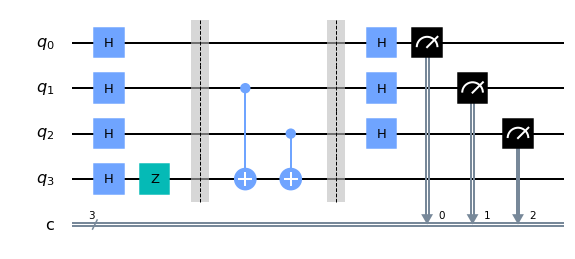

In [10]:
bv_circuit = construct_bv_circuit("110")
bv_circuit.draw("mpl")

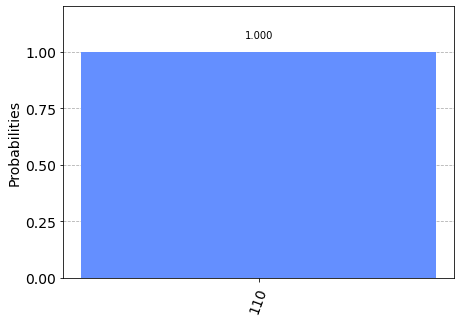

In [11]:
answer = simulate_circuit(bv_circuit)
plot_histogram(answer)

In [12]:
s = "110"
print(s[0], s[1], s[2])

1 1 0


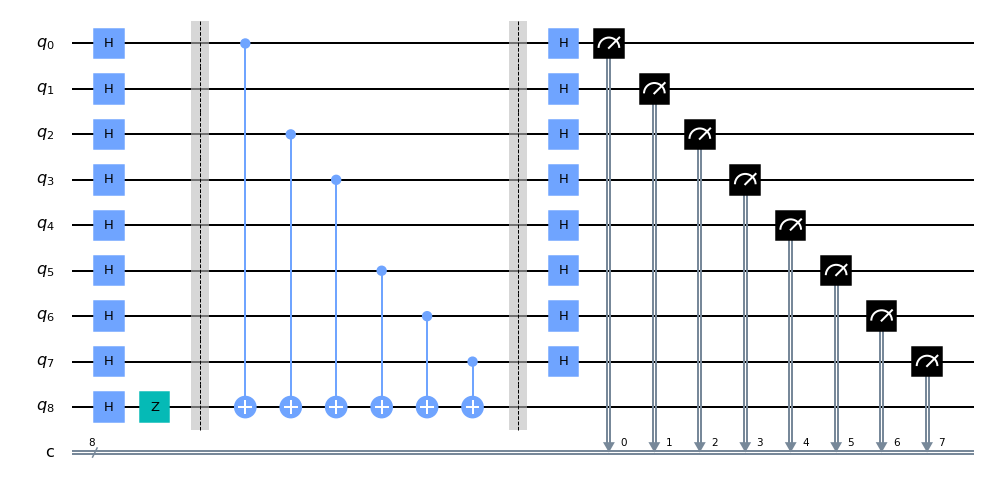

In [15]:
bv_circuit = construct_bv_circuit("11101101")
bv_circuit.draw("mpl")

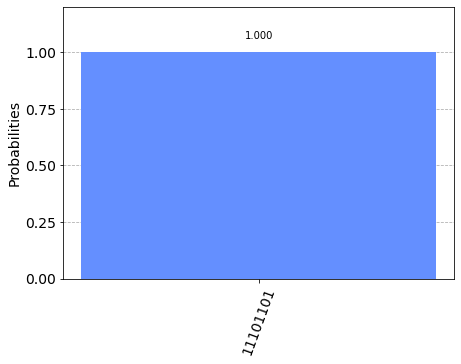

In [16]:
answer = simulate_circuit(bv_circuit)
plot_histogram(answer)